# Test hands to open several hand compositions (genetic) 
### Some card classes
- Starters 
- Extenders
- Handtraps
- Non Engine Consistency (Pot cards)
- Board Breakers
### Assumption: 
- Pseudorandom shuffle of the deck in python is equivalent to a real shuffle

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
CLASSES = [
    {0: "Starters"},
    {1: "Extenders"},
    {2: "NonEngineConsistency"},
    {3: "HandTraps"},
    {4: "BoardBreakers"}
]
DECKSIZE = 40

Random Deck:


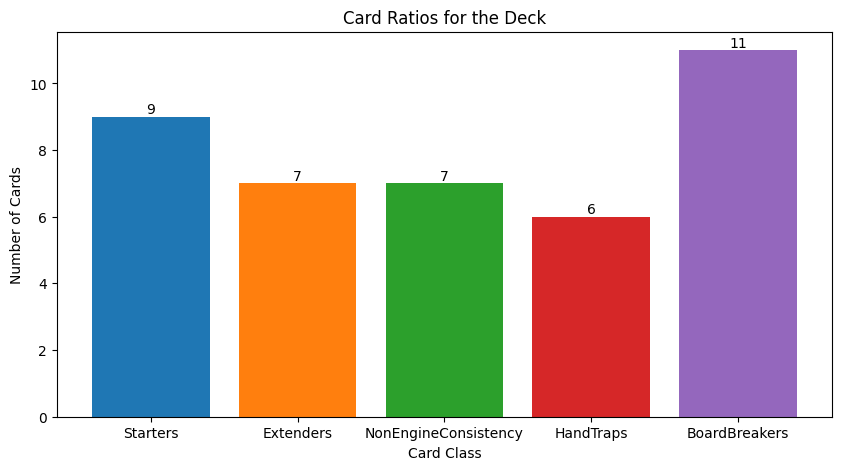

                      Ratios
Starters                22.5
Extenders               17.5
NonEngineConsistency    17.5
HandTraps               15.0
BoardBreakers           27.5


In [129]:
def create_random_deck(n):
    deck = []
    for i in range(n):
        deck.append(np.random.randint(0, len(CLASSES)))
    return deck

def show_deck(deck):
    plt.figure(figsize=(10, 5))
    plt.title("Card Ratios for the Deck")
    plt.xlabel("Card Class")
    plt.ylabel("Number of Cards")
    for i in range(len(CLASSES)):
        count = 0
        for j in deck:
            if j == i:
                count += 1
        plt.bar(CLASSES[i][i], count)
        plt.text(i, count, count, ha = 'center', va = 'bottom')
    plt.show()

def show_deck_ratios(deck):
    scores = []
    for i in range(len(CLASSES)):
        count = 0
        for j in deck:
            if j == i:
                count += 1
                
        scores.append(round(count / DECKSIZE * 100, 2))
    df = pd.DataFrame(scores, index=[CLASSES[i][i] for i in range(len(CLASSES))], columns=["Ratios"])
    print(df)

print("Random Deck:")
deck = create_random_deck(DECKSIZE)
show_deck(deck)
show_deck_ratios(deck)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


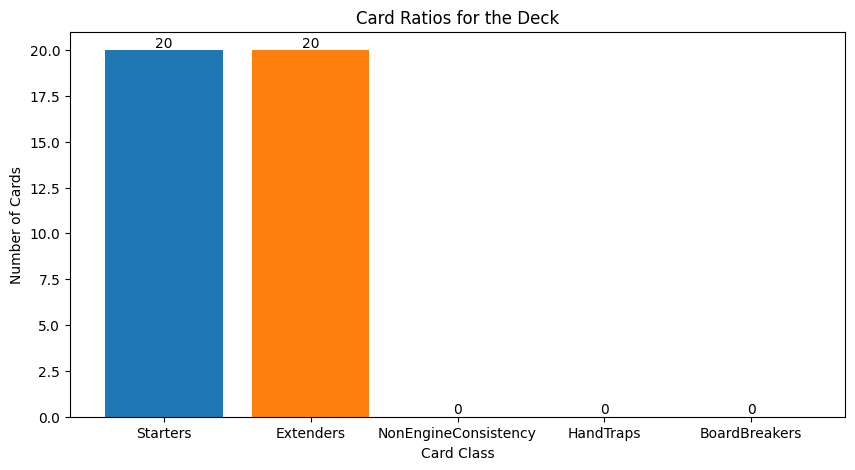

In [130]:
ratios = [20, 20, 0, 0, 0]

def create_deck(ratios):
    deck = np.array([])
    for i in range(len(ratios)):
        # append the number of cards of each class
        deck = np.append(deck, np.full(ratios[i], i))
    print(deck)
    np.random.shuffle(deck)
    return deck
        

deck = create_deck(ratios)
show_deck(deck)

In [131]:
def draw_hands(deck, h, n):
    hands = []
    for i in range(n):
        hands.append(np.random.choice(deck, h))
    return hands

In [132]:
def evaluate_hands(hands, alpha):
    scores = []
    final_statistic = 0

    for hand in hands:
        score = 0
        seen_starter = 0
        diversity = 0
        if 0 in hand:
            seen_starter = 1
        diversity = len(set(hand))/len(hand)
        
        score = seen_starter * alpha + diversity * (1 - alpha)
        scores.append(score)


    final_statistic = np.mean(scores)
    return final_statistic

In [133]:
def deck_compositions_2_classes():
    zeros = np.zeros(DECKSIZE)
    ones = np.ones(DECKSIZE)
    decks = []
    for i in range(DECKSIZE):
        deck = np.zeros(DECKSIZE)
        # from 0 to i, we have 0s
        deck[:i] = zeros[:i]
        # from i to DECKSIZE, we have 1s
        deck[i:] = ones[i:]
        decks.append(deck)
    return decks

In [134]:
decks = deck_compositions_2_classes()
scores = []
for deck in decks:
    hands = draw_hands(deck, 5, 10000)
    score = evaluate_hands(hands, 0.5)
    scores.append(score)


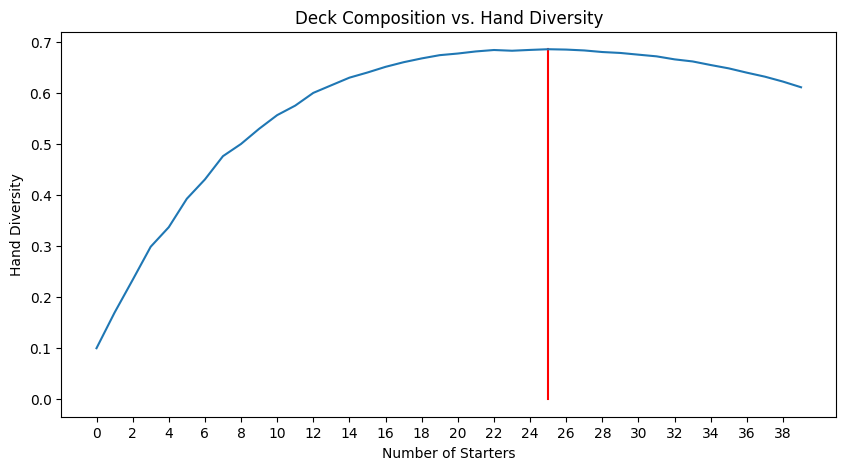

In [141]:
plt.figure(figsize=(10, 5))
plt.title("Deck Composition vs. Hand Diversity")
plt.xlabel("Number of Starters")
plt.ylabel("Hand Diversity")
plt.xticks(np.arange(0, DECKSIZE, 2))

max_score = np.max(scores)
max_index = np.argmax(scores)
plt.plot([max_index, max_index], [0, max_score], color='red')
plt.plot(scores)
plt.show()
